In [67]:
import pandas as pd
import nltk
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from xml.sax.saxutils import unescape

In [68]:
#Get our data collected from Reddit
df = pd.read_csv("dirty_table.csv")

In [69]:
df.sample(10)

,Unnamed: 0,subreddit,body,created_utc
20565,65,vegetarian,"I do a lot of sliced green olives, sliced onio...",1627268093
36372,72,vegetarian,"Oh man, you are not the first person I have he...",1622765717
29511,11,vegetarian,[removed],1624976511
29059,59,vegetarian,Also packed with sugar.,1625082552
39523,23,vegetarian,it’s just naan btw not naan bread \n\nsource: ...,1621815034
23038,38,vegetarian,"Hardly, but it's the most egregious case I've ...",1626527401
4702,2,vegan,Good to know. This is fraudulent advertising.,1627327960
20830,30,vegetarian,Raised by a vet and can second that. I was alw...,1627197437
5533,33,vegan,Imagine going into a vegan sub complaining abo...,1627302553
13729,29,vegan,Lupin Beans. r/savedyouaclick,1626959883


In [70]:
#we need to delete created_utc and Unnamed

In [71]:
df.drop(columns=['Unnamed: 0','created_utc'], inplace=True)

In [72]:
df.sample(10)

,subreddit,body
14984,vegan,[removed]
27134,vegetarian,I agree - just saying what is traditional.
25863,vegetarian,Is this beard friendly?
27120,vegetarian,Caesar dressing has fish in it :’(
29158,vegetarian,I did just buy dry chickpeas. I like chickpeas...
278,vegan,Watch the life-changing and award winning docu...
35063,vegetarian,[removed]
11393,vegan,"I implore you, please research this topic. Thi..."
38686,vegetarian,"I mean, it might be obvious, but protein powde..."
29013,vegetarian,Smoked or bbq tofu is really good


In [73]:
df.shape

(40000, 2)

In [74]:
df[df['body'].duplicated() == False]

,subreddit,body
0,vegan,Haha did I? Thats hilarious. But yes I am a ve...
1,vegan,"Enjoy your early death from heart disease, ass"
2,vegan,Yeah I put the brackets while typing my commen...
3,vegan,definitely understand your point of view. 150%.
4,vegan,Watch Dominion. That’ll do it. And any other d...
...,...,...
39994,vegetarian,"Oh crap, I didn’t know it was so soon! I thoug..."
39995,vegetarian,i get mine from morrisons
39996,vegetarian,Omg same! I think I had a steak once in my lif...
39997,vegetarian,"I’m super late to the convo, but Oatly went pu..."


In [75]:
#drop duplicates
df.drop_duplicates(subset='body', inplace=True)

In [76]:
df.shape

(36370, 2)

In [77]:
#so we lost almost 4000 posts

In [78]:
# Replace null cells with empty strings
df['body'].fillna(value='', inplace=True)

In [79]:
from xml.sax.saxutils import unescape
df['body'] = df['body'].apply(unescape)

In [80]:
df.shape

(36370, 2)

In [81]:
cvec = CountVectorizer(stop_words='english')
tfidf = TfidfVectorizer(stop_words='english')

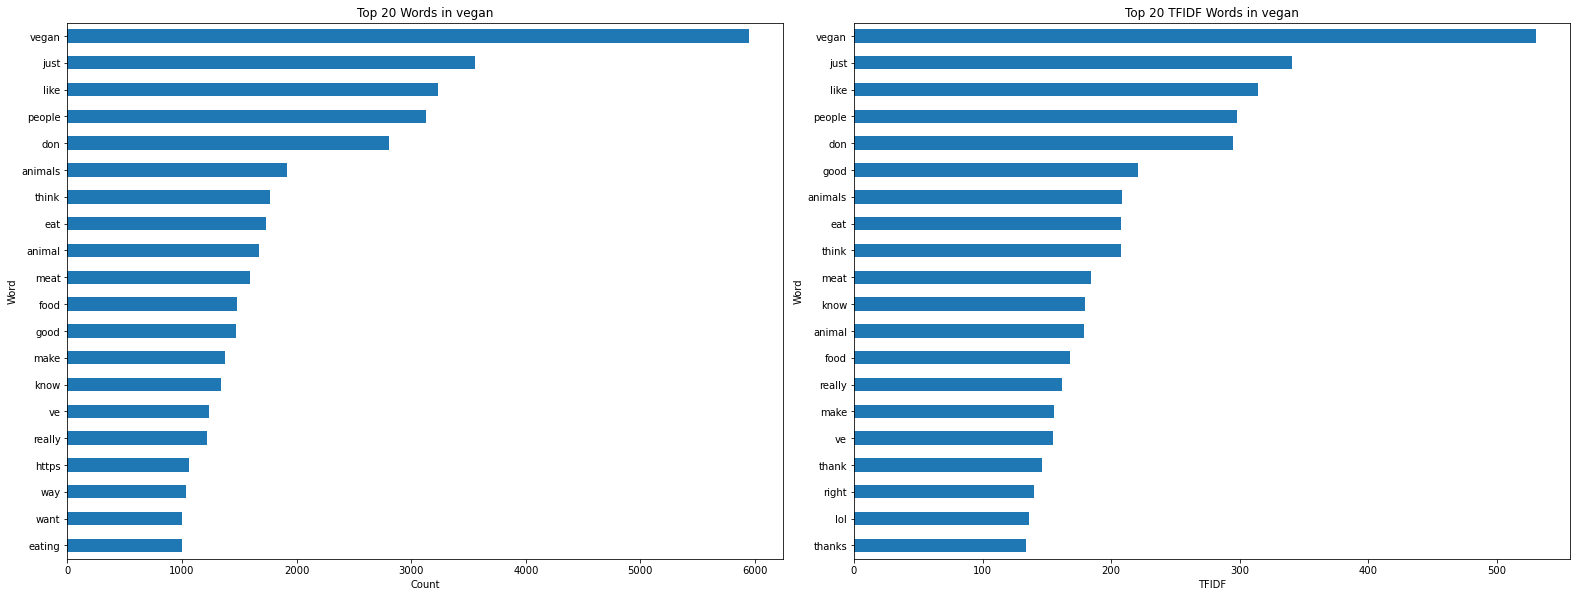

In [82]:
# Explore CountVectorizer token counts r/vegan
words_cvec_pf = pd.DataFrame(cvec.fit_transform(df[df.subreddit=='vegan'].body).todense(),
                       columns=cvec.get_feature_names())
word_cvec_counts_pf = words_cvec_pf.sum(axis=0)

# Explore TfidfVectorizer token counts r/vegan
words_tfidf_pf = pd.DataFrame(tfidf.fit_transform(df[df.subreddit=='vegan'].body).todense(),
                       columns=tfidf.get_feature_names())
word_counts_tfidf_pf = words_tfidf_pf.sum(axis=0)

# Plot top 20 words
plt.figure(figsize=(22,16), facecolor='white')

plt.subplot(2,2,1)
word_cvec_counts_pf.sort_values().tail(20).plot(kind='barh')
plt.title('Top 20 Words in vegan')
plt.xlabel('Count')
plt.ylabel('Word')
plt.savefig('T20_vegan.png')

plt.subplot(2,2,2)
word_counts_tfidf_pf.sort_values().tail(20).plot(kind='barh')
plt.title('Top 20 TFIDF Words in vegan')
plt.xlabel('TFIDF')
plt.ylabel('Word')
plt.savefig('TFID_vegan.png')

plt.tight_layout()

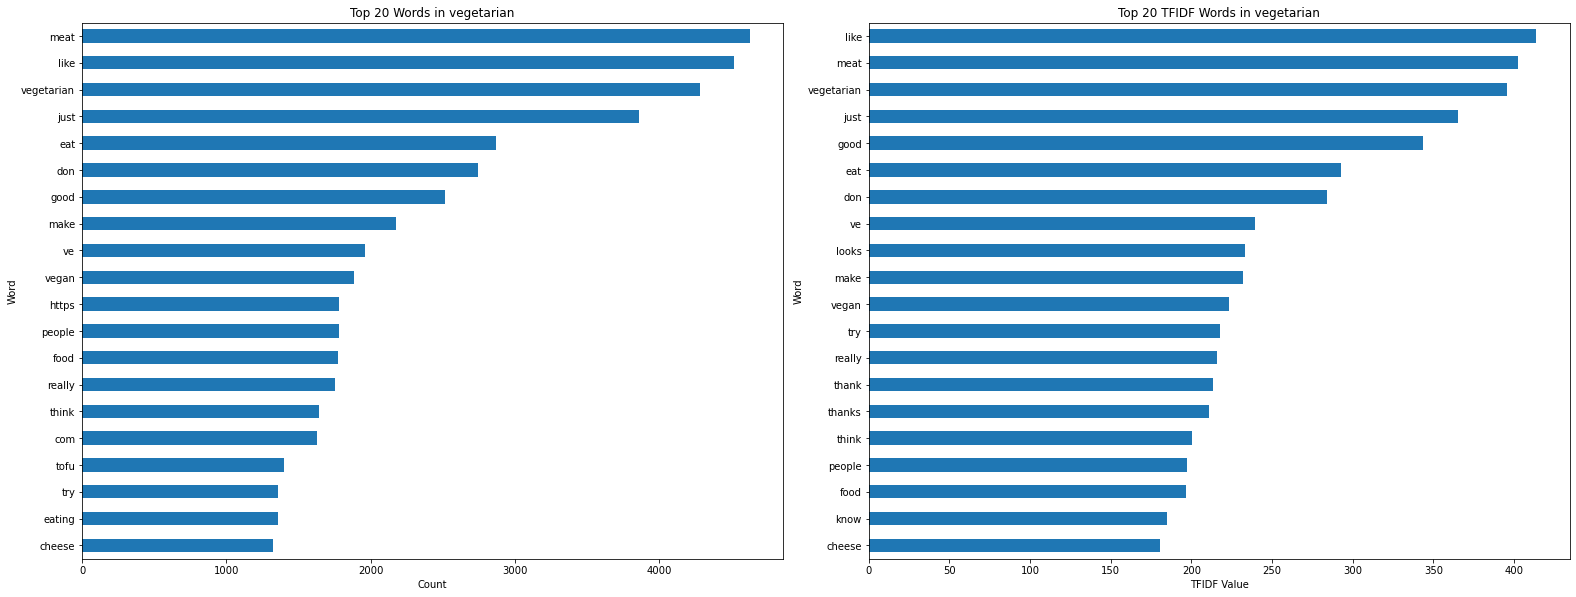

In [83]:
# Explore CountVectorizer token counts in vegetarian
words_cvec_ra = pd.DataFrame(cvec.fit_transform(df[df.subreddit=='vegetarian'].body).todense(),
                       columns=cvec.get_feature_names())
word_counts_cvec_ra = words_cvec_ra.sum(axis=0)

# Explore TfidfVectorizer token counts in vegetarian
words_tfidf_ra = pd.DataFrame(tfidf.fit_transform(df[df.subreddit=='vegetarian'].body).todense(),
                       columns=tfidf.get_feature_names())
word_counts_tfidf_ra = words_tfidf_ra.sum(axis=0)

# Plot top 20 words
plt.figure(figsize=(22,16), facecolor='white')

plt.subplot(2,2,1)
word_counts_cvec_ra.sort_values().tail(20).plot(kind='barh')
plt.title('Top 20 Words in vegetarian')
plt.xlabel('Count')
plt.ylabel('Word')
plt.savefig('T20_vegetarian.png')

plt.subplot(2,2,2)
word_counts_tfidf_ra.sort_values().tail(20).plot(kind='barh')
plt.title('Top 20 TFIDF Words in vegetarian')
plt.xlabel('TFIDF Value')
plt.ylabel('Word')
plt.savefig('TFID_vegetarian.png')

plt.tight_layout()

In [84]:
##lastly we make vegan == 1 vegetarian == 0
df['subreddit'] = df['subreddit'].map({'vegan': 1, 'vegetarian': 0})

In [86]:
df.sample(10)

,subreddit,body
31329,0,YUM
11738,1,Very occasionally dates or vego chocolate.
14391,1,Chicken.\n\nChicken does not count as meat doe...
22154,0,Oh that's weird! When did you visit? Because I...
2845,1,I find it makes tofu extremely crispy! I love ...
20532,0,Veggie as in vegetarian right? I still don't u...
28293,0,"maybe try some ground up seaweed sheets, it ca..."
10982,1,Where’s my oat milk gang at?
39193,0,Great job! This is my favorite meal and comfor...
26676,0,"I used to hate cream soda as a kid, but for so..."


In [87]:
#save our data
df.to_csv('clean_table.csv')